Here we are trying to generate a visualization of all second-degree followers of a soundcloud user. Soundcloud has an awesome API, you just have to register with them: https://developers.soundcloud.com/docs/api. It even has a python wrapper!

First, we'll initialize the client object, which allows us to make requests of the API easily.

In [1]:
import soundcloud

client = soundcloud.Client(client_id='85d3857863f87e52fc6f3a48e11dead7')

Now, let's grab the first degree followers of the original user we want to target.

In [2]:
original_user = "121898734"
first_degrees = client.get('/users/' + original_user + '/followers')

Now, we can intialize the networkx graph, and add the first node, which is the original user. Networkx is a very simple library for generating networks. It will even allow us to quickly generate visualizations!

In [3]:
import networkx as nx
G = nx.DiGraph()
G.add_node(original_user, home=True)

Now, we will iterate over the list of first degree followers, add a node and an edge to the original user. We then grab all of the followers of the first degree followers to get a list of second degree followers. We iterate over these and add their nodes and edges.

There was a lot of trial and error, the soundcloud python wrapper puts the data into a strange object that they created themselves. I had to do a lot of exploration to get at the data sent back by the API.

In [4]:
for first_degree_follower in first_degrees.obj['collection']:
    G.add_node(str(first_degree_follower['id']), home=False)
    G.add_edge(str(first_degree_follower['id']),original_user)
    try: 
        second_degrees = client.get('/users/' + str(first_degree_follower['id']) + '/followers')
    except: 
        print("500 error: " + first_degree_follower['id'])
    for second_degree_follower in second_degrees.obj['collection']:
        G.add_node(str(second_degree_follower['id']), home=False)
        G.add_edge(str(second_degree_follower['id']), first_degree_follower['id'])  
# The API gives 500 errors if I try to make too many requests. You can try grabbing the third degree followers
# but it results in a network of ~40000 nodes and ~55000 edges anyways, so it's a little much for our visualization.
#        try:
#            third_degrees = client.get('/users/' + str(second_degree_follower['id']) + '/followers')
#        except: 
#            print("Failed: " + first_degree_follower['id'])
#        for third_degree_follower in third_degrees.obj['collection']:
#            G.add_node(str(third_degree_follower['id']), home=False)
#            G.add_edge(str(third_degree_follower['id']), second_degree_follower['id'])  

Let's make our first graph. This was a lot of trial and error to get to this point, but I finally got to something I thought was somewhat acceptable.

/Users/camdenclark/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/camdenclark/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/camdenclark/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/camdenclark/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

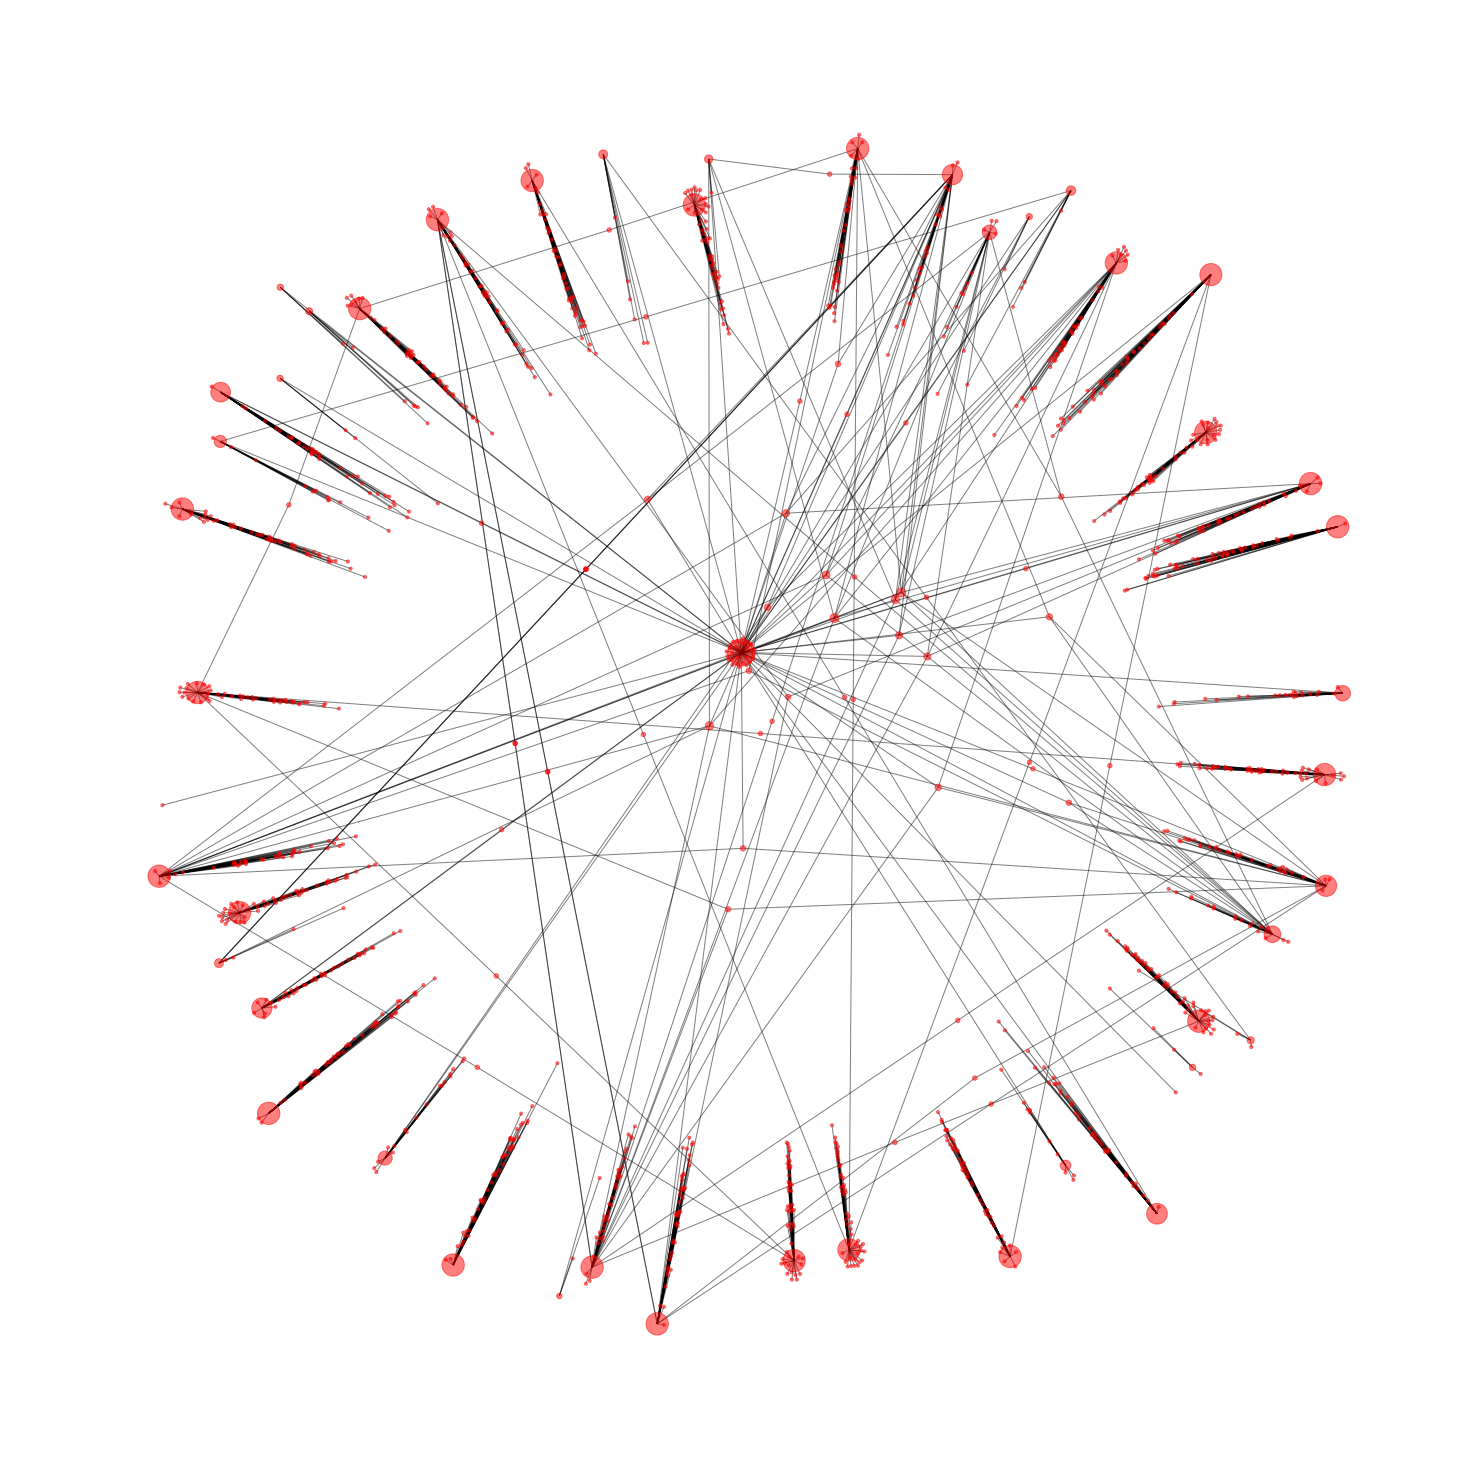

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(20,20))
node_sizes = [len(list(nx.all_neighbors(G,node))) * 10 for node in G.nodes()]
nx.draw(G, pos=nx.spring_layout(G), k=1, arrows=False, node_size=node_sizes, alpha=.5)
plt.savefig("soundcloud_network.png")

We can also create a graphml file and just import it into gephi or a similar program. I've avoided this to see how good this package is at creating visualizations without much interference from me.

In [6]:
nx.write_graphml(G,"soundcloud_graph.graphml") 

I decided to try a new approach by changing some of the parameters. It's pretty clear that a lot of the nodes are obscured by the edges in the first visualization. We can iterate through the spring_layout fewer times to lessen this effect. We also generate a larger space to get a larger figure.

/Users/camdenclark/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/camdenclark/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/camdenclark/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/camdenclark/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

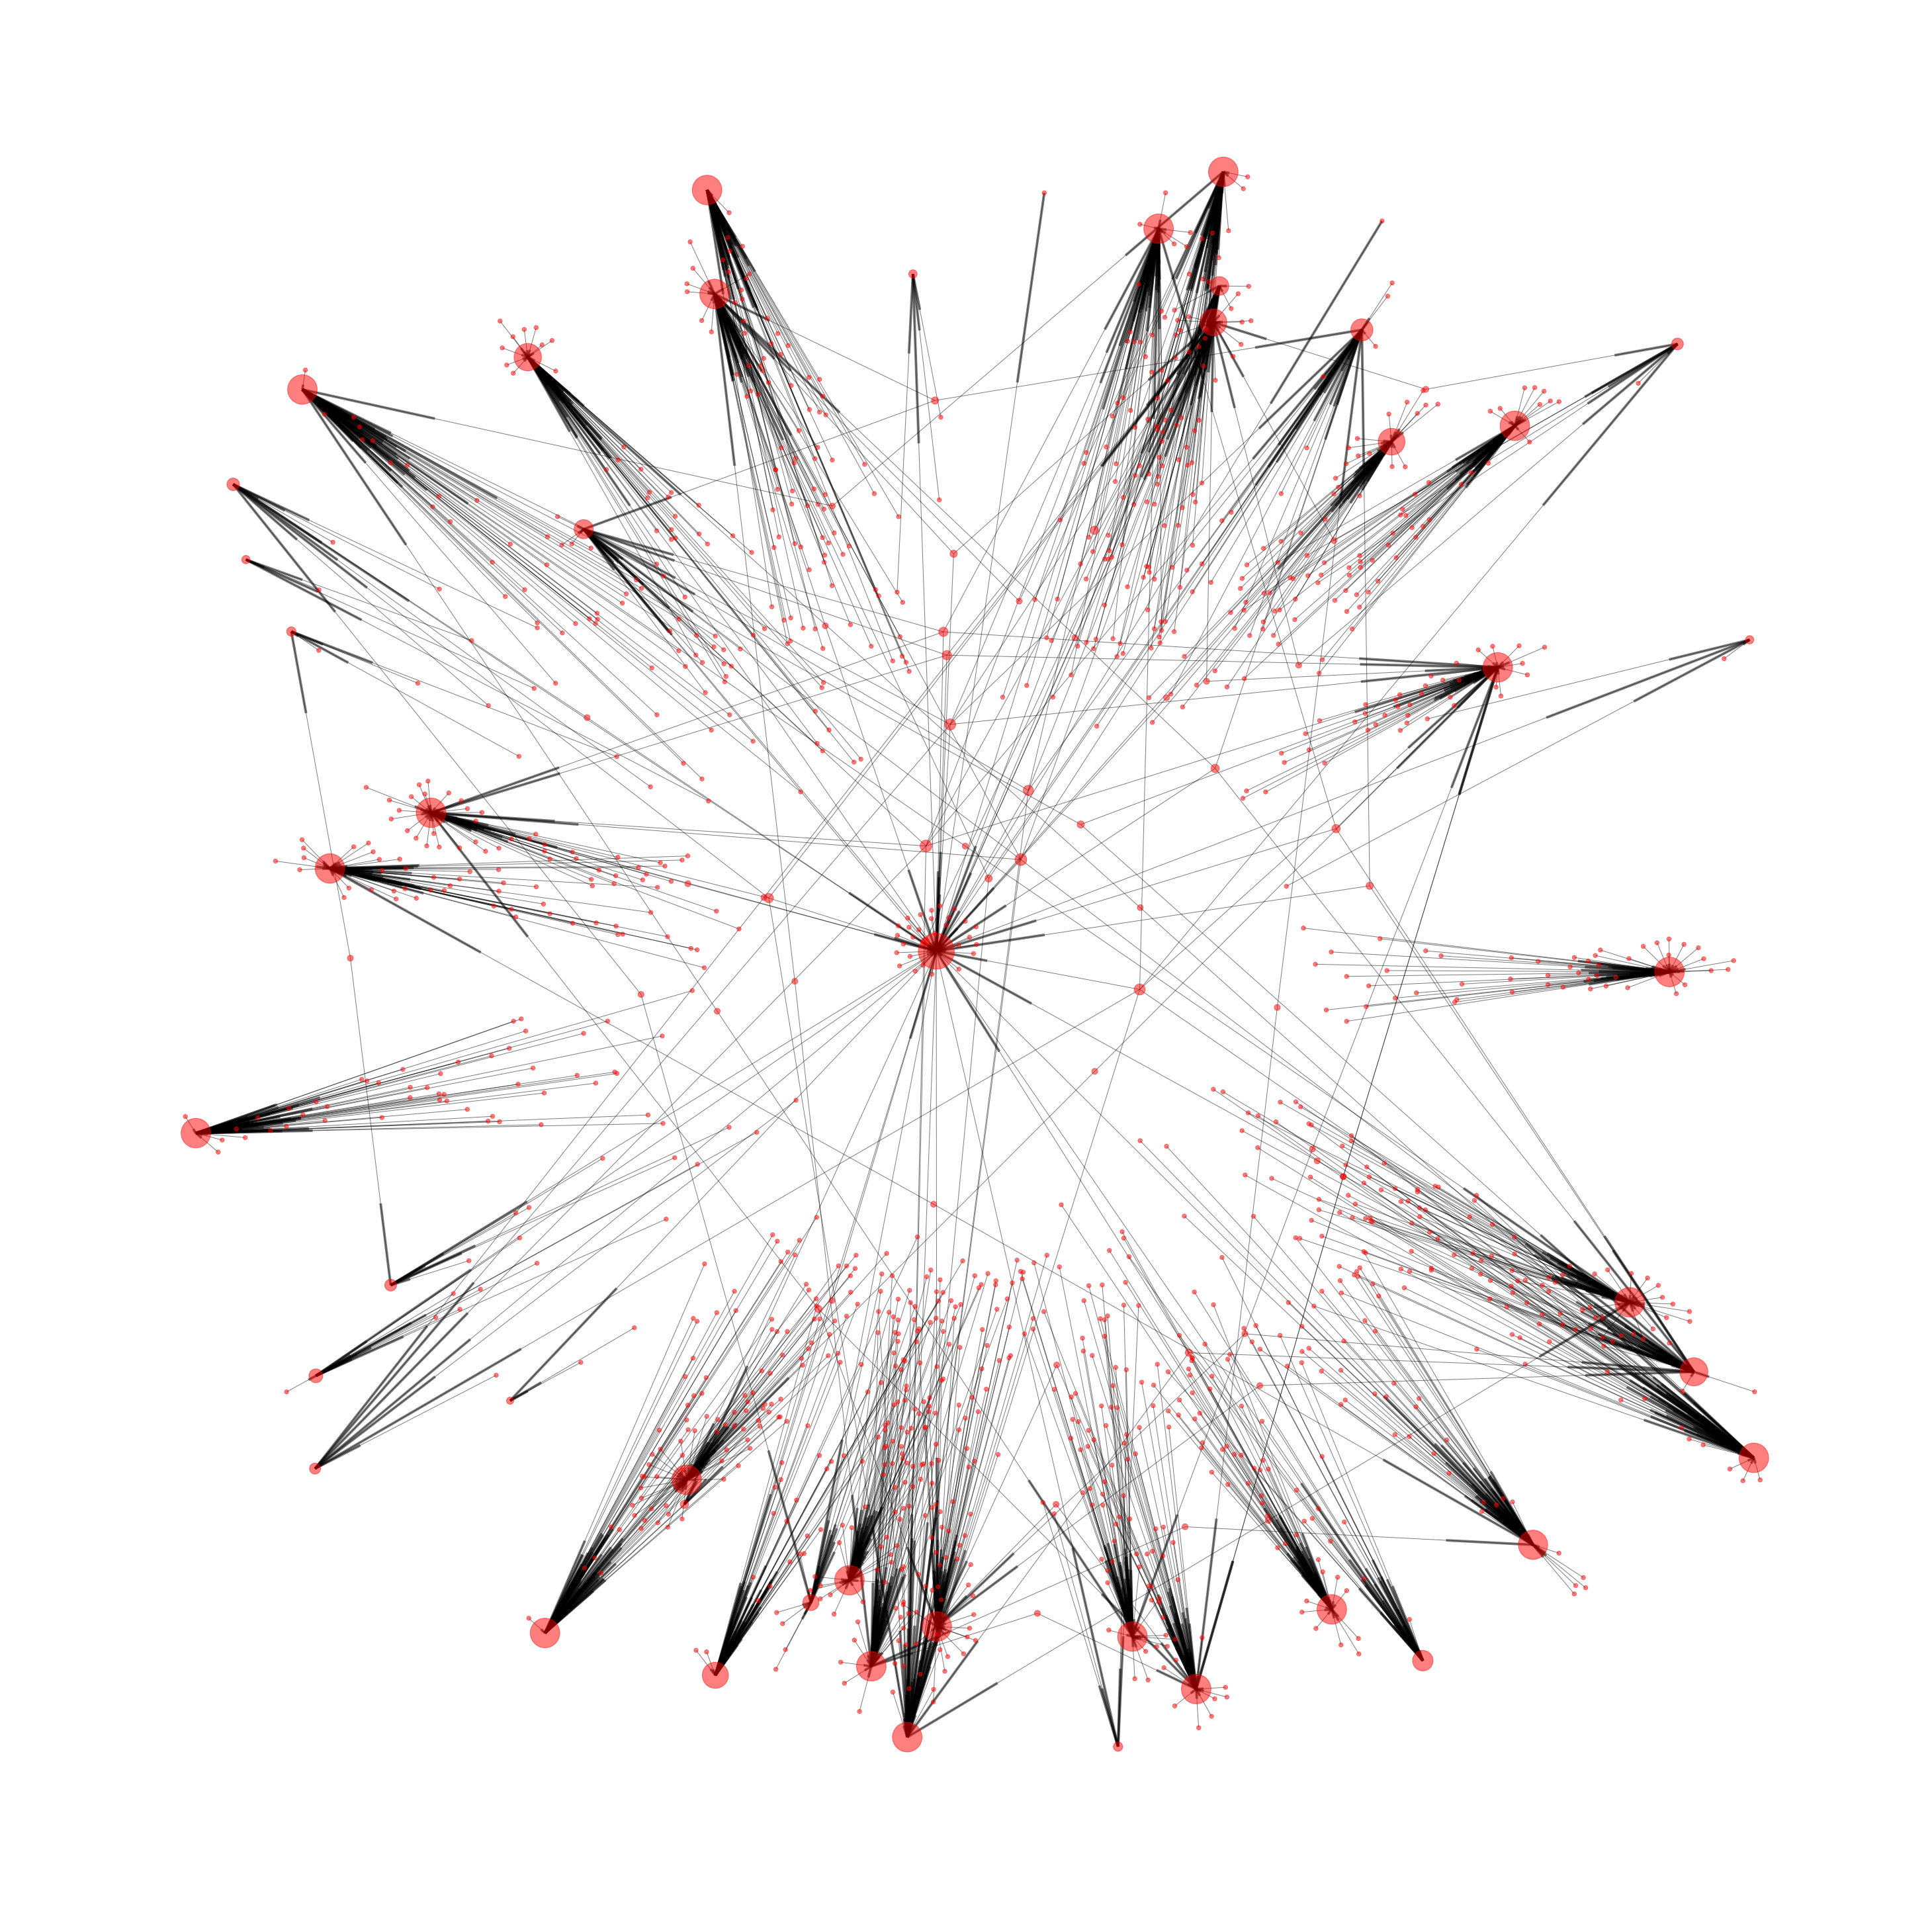

In [7]:
plt.figure(figsize=(40,40))
node_sizes = [len(list(nx.all_neighbors(G,node))) * 40 for node in G.nodes()]
nx.draw(G, pos=nx.spring_layout(G, iterations=20), k=.1, node_size=node_sizes, alpha=.5)
plt.savefig("soundcloud_network_2.png")

I wanted a bit more organization, and the arrows showing directedness are pretty obnoxious. Thus, we end up with my "final" visualization. I'm pretty happy with the results.

/Users/camdenclark/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/camdenclark/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/camdenclark/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/camdenclark/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

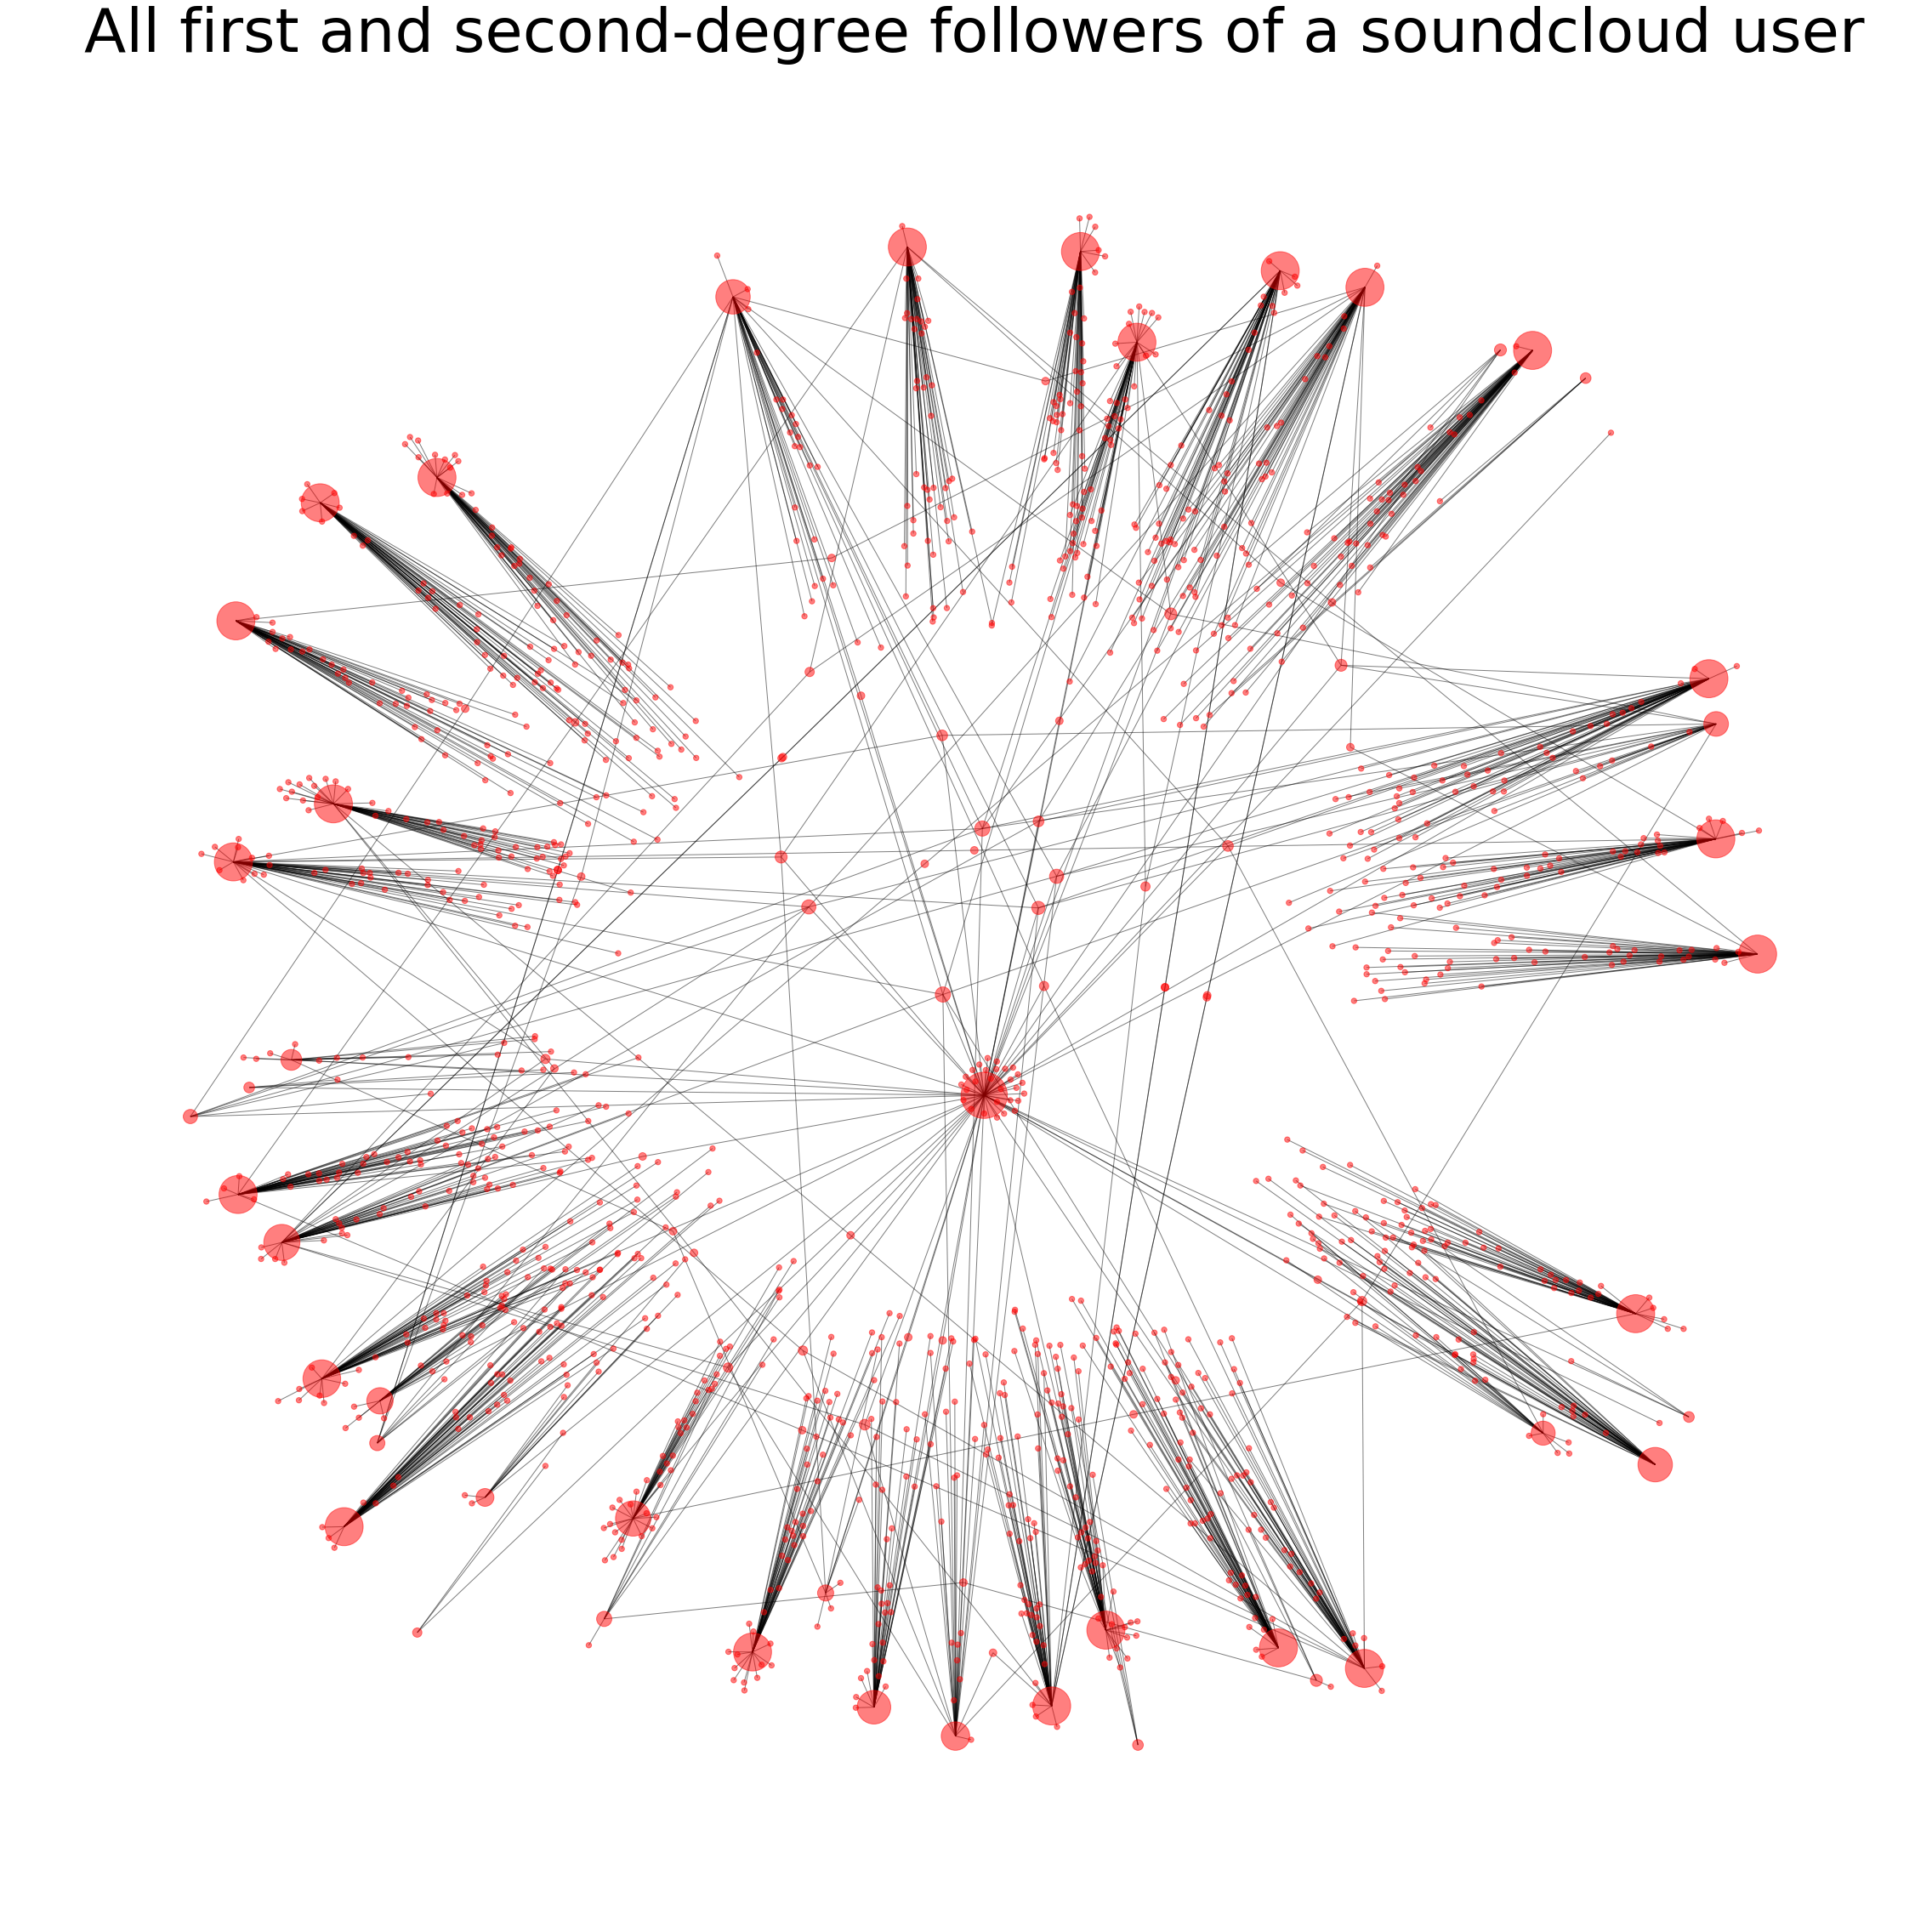

In [10]:
plt.figure(figsize=(40,40))
node_sizes = [len(list(nx.all_neighbors(G,node))) * 40 for node in G.nodes()]
plt.title("All first and second-degree followers of a soundcloud user", fontsize=72)
nx.draw(G, pos=nx.spring_layout(G, iterations=25), k=.1, arrows=False, node_size=node_sizes, alpha=.5)
plt.savefig("soundcloud_network_final.png")

I then cropped to get a final picture, I did that manually.

Thanks for reading this far, I hope you enjoyed this visualization. Definitely make your own developer account on soundcloud, there's a lot of great information you can glean from it. I hope to see your work in the future.

Follow me on twitter below! Thanks again.